In [3]:
import pickle
# add multipoles package path
import sys
# sys.path.append('/Users/nem0x/Documents/Pyckages')
import os
sys.path.append('../')
sys.path.append(os.path.join(os.path.abspath(os.getcwd()), "networks"))
sys.path.append('/Users/Ben/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/trap_tools')
sys.path.append('/Users/Ben/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ionLifetimes/bem/examples/SimpleTrap')
from Electrodes.multipoles import MultipoleControl

%matplotlib inline
import numpy as np
import pandas as pd
from itertools import compress
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset, zoomed_inset_axes
from ipywidgets import interactive, interact
import ipywidgets as widgets
from Electrodes.plottingfuncns import *

/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_85138/3304832128.py:17: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset, zoomed_inset_axes


# import data, and define parameters

In [5]:
path = '../Electrodes/htrap_simulation_1.pkl'

f = open(path,'rb')
trap = pickle.load(f)

In [6]:
zl = 266*1e-3
xl = -3.7*1e-3
yl = 76.32*1e-3
position = [xl,yl,zl]
nROI = 5
roi = [nROI,nROI,nROI]
order = 2
trap['Z'] = np.array(trap['Z'])
trap['X'] = np.array(trap['X'])
trap['Y'] = np.array(trap['Y'])
controlled_electrodes = []
strs = "DC1 DC2 DC3 DC4 DC5 DC6 DC7 DC8 DC9 DC10 DC11 DC12 DC13 DC14 DC15 DC16 DC17 DC18 DC19 DC20 DC21".split()
excl = {
"DC6": "gnd",
    "DC4": "gnd",
    "DC5": "gnd",
    "DC8": "gnd",
    "DC14": "DC13",
    "DC11": "gnd",
    "DC12": "gnd"
}
for electrode in strs:
    if electrode in excl and excl[electrode] != "gnd":
            trap['electrodes'][excl[electrode]]["potential"] = trap['electrodes'][excl[electrode]]["potential"]+trap['electrodes'][electrode]["potential"]
    elif electrode not in excl:
        controlled_electrodes.append(electrode)

used_order1multipoles = ['Ex','Ey','Ez']
used_order2multipoles = ['U1','U2','U3','U4','U5']
used_multipoles = used_order1multipoles + used_order2multipoles
print(used_multipoles)
position = np.array(position)

x0_ind = (np.abs(trap['X'] - position[0])).argmin()
y0_ind = (np.abs(trap['Y'] - position[1])).argmin()
z0_ind = (np.abs(trap['Z'] - position[2])).argmin()

['Ex', 'Ey', 'Ez', 'U1', 'U2', 'U3', 'U4', 'U5']


# create object

In [7]:
print(trap['Y'])

[0.02732 0.02932 0.03132 0.03332 0.03532 0.03732 0.03932 0.04132 0.04332
 0.04532 0.04732 0.04932 0.05132 0.05332 0.05532 0.05732 0.05932 0.06132
 0.06332 0.06532 0.06732 0.06932 0.07132 0.07332 0.07532 0.07732 0.07932
 0.08132 0.08332 0.08532 0.08732 0.08932 0.09132 0.09332 0.09532 0.09732
 0.09932 0.10132 0.10332 0.10532 0.10732 0.10932 0.11132 0.11332 0.11532
 0.11732 0.11932 0.12132 0.12332 0.12532]


In [8]:
s = MultipoleControl(trap, position, roi, controlled_electrodes, used_multipoles, order)
print('Multipole names:', s.multipole_names)
print('Normalization factors:', s.normalization_factors)

Multipole names: ['C', 'Ey', 'Ez', 'Ex', 'U3', 'U4', 'U2', 'U5', 'U1']
Normalization factors: [0.28209479 0.48860251 0.48860251 0.48860251 1.09254843 1.09254843
 0.63078313 1.09254843 0.54627422]


In [9]:
s.multipole_expansion

,DC1,DC2,DC3,DC4,DC5,DC6,DC7,DC8,DC9,DC10,...,DC12,DC13,DC14,DC15,DC16,DC17,DC18,DC19,DC20,DC21
C,0.003190,0.006479,0.009980,0.042080,0.228709,-0.024479,-0.297067,0.063486,0.042661,0.016179,...,0.006205,0.046128,0.036832,0.160081,-0.027733,-0.182420,0.024560,0.029528,0.012771,0.560643
Ey,0.024444,0.045400,0.061046,0.192945,0.674217,0.419265,0.087389,-0.256208,-0.177039,-0.081949,...,0.043737,0.234651,0.176654,0.569995,0.395530,0.042464,-0.200333,-0.143428,-0.069979,-3.507120
Ez,0.005280,0.012305,0.020745,0.099341,0.574376,-0.266541,-0.953104,0.248736,0.153676,0.056790,...,0.011641,0.104600,0.085402,0.384978,-0.220577,-0.597505,0.107404,0.107383,0.044817,0.764806
Ex,-0.002338,-0.006001,-0.012083,-0.063389,-0.772763,-1.681652,0.706631,0.739007,0.178825,0.047183,...,0.005999,0.071944,0.059914,0.603102,1.019181,-0.343007,-0.498472,-0.147424,-0.044138,0.246268
U3,-0.008474,-0.018572,-0.032698,-0.119992,-0.743293,-0.966795,-0.831673,-0.831496,-0.335904,-0.132103,...,0.019910,0.156217,0.122658,0.704275,1.098490,1.139767,0.767090,0.317845,0.130592,-8.930627
U4,0.019639,0.043146,0.062244,0.221552,0.818794,0.358207,-0.179546,-0.638870,-0.413773,-0.208536,...,0.041228,0.259202,0.200325,0.678785,0.357322,-0.215263,-0.521377,-0.347953,-0.184359,-0.161633
U2,0.002847,0.006908,0.012269,0.063004,0.374843,-0.296868,-0.692976,0.273820,0.155489,0.059952,...,0.006476,0.064774,0.053445,0.242080,-0.230091,-0.434389,0.141131,0.113096,0.048792,0.600516
U5,-0.002420,-0.006914,-0.014541,-0.082910,-1.074620,-2.203159,1.676289,1.364342,0.337994,0.094010,...,0.006968,0.092638,0.077973,0.825712,1.281642,-0.932370,-0.946779,-0.282929,-0.088119,-0.003360
U1,0.002929,0.005175,0.008251,0.037869,0.467407,1.999969,2.563450,0.682925,0.144391,0.042417,...,0.005071,0.043980,0.035556,0.385827,1.328889,1.631051,0.523737,0.126098,0.039524,-34.981101


# plot multipole coefficients vs multipole names for each electrode at a certain height

In [13]:
v1 = pd.Series(np.zeros(len(controlled_electrodes)), index = controlled_electrodes)
vs = []
for ele in s.electrode_names:
    v = v1.copy()
    v[ele] = 1
    vs.append(v)
# print vs
    
interactive_plot = interactive(plot_multipole_vs_expansion_height, height = (0,10))
output = interactive_plot.children[-1]
output.layout.height = '1800px'
interactive_plot


ValueError: cannot find widget or abbreviation for argument: 'position'

# plot multipole coefficients vs different heights for each electrode

In [14]:
numMUltipoles = len(s.multipole_print_names)
ne = len(s.electrode_names)
multipoles_vs_height = np.zeros((len(height_list), numMUltipoles, ne))
print(height_list)
for i, height in enumerate(height_list):
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    multipoles_vs_height[i] = np.asarray(s.multipole_expansion.loc[s.multipole_names])

size = 15
fig,ax = plt.subplots(numMUltipoles,1,figsize = (20,60))

from matplotlib import cm
colormap = cm.get_cmap('tab20')

for i, mul in enumerate(s.multipole_print_names):
    for j, ele in enumerate(s.electrode_names[0:1]):
        ax[i].plot(height_list, multipoles_vs_height[:,i,j], label = ele)
        ax[i].set_title(mul, fontsize = size)
        ax[i].set_xticks(height_list)
#         ax[i].set_xlim(left=50, right=100)
        ax[i].tick_params(labelsize = size)
        ax[i].set_xlabel('Height (um)', fontsize = size)
    update_colors(ax[i])
    ax[i].legend(fontsize = size, bbox_to_anchor=(1, 1))
        
fig.canvas.draw()
fig.tight_layout(pad=1)

NameError: name 'height_list' is not defined

# plot voltage solution of a group of multipole coefficients

In [15]:
interactive_plot = interactive(plot_muls, 
                               s = (s),xl = (xl),zl = (zl),roi = (roi),
                               height = (45,115,5), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

ValueError: <Electrodes.multipoles.MultipoleControl object at 0x7fcb8aabcaf0> cannot be transformed to a widget

# plot coefficients can be achieved for each multipole (controlled individually) when apply max 40 volts

/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_85138/3812108193.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Coeffs_temp = pd.Series()
/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_85138/3812108193.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Coeffs_temp = pd.Series()
/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_85138/3812108193.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Coeffs_temp = pd.Series()
/var/folders/5m/rhf_xw8938df96n0qywsvnlh0000gn/T/ipykernel_85138/3812108193.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future versi

Text(0, 0.5, '$Ca^{+}$ trap frequency (MHz)')

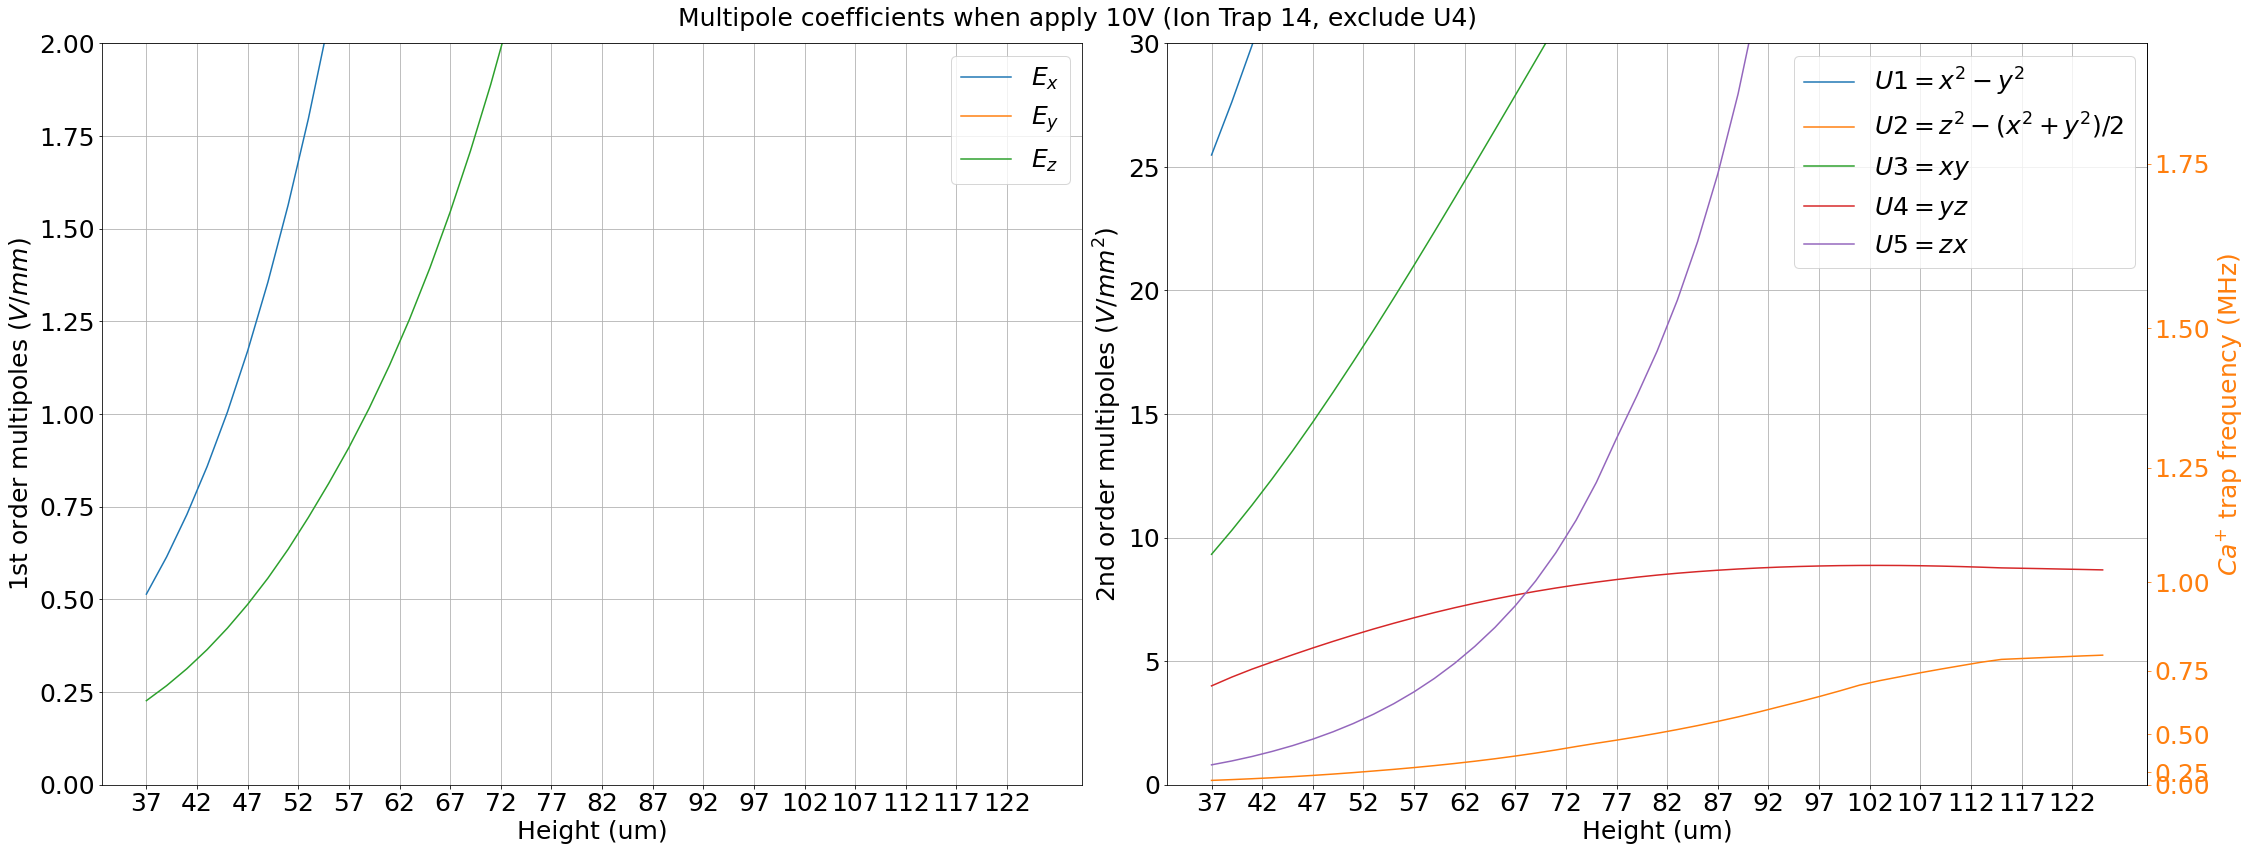

In [16]:
height_list = np.round(trap['Y'][nROI:]*1e3)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame()
for height in height_list:
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    
    Coeffs_temp = pd.Series()
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index = used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = 40/max_v
    
    Coeffs[height] = Coeffs_temp

size = 25
# plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30,12))
for mul in used_order1multipoles:
    ax1.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax1.set_ylabel(r'1st order multipoles $(V/mm)$', fontsize = size)
ax1.set_xticks(np.arange(height_list[0],height_list[-1]+1,5))
ax1.set_xlabel('Height (um)', fontsize = size)
ax1.tick_params(labelsize = size)
ax1.legend(fontsize = size)

ax1.set_ylim(0, 2) # set ylim

ax1.grid(True)

for mul in used_order2multipoles:
    ax2.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax2.set_ylabel(r'2nd order multipoles $(V/mm^2)$', fontsize = size)
ax2.set_xticks(np.arange(height_list[0],height_list[-1]+1,5))
ax2.set_xlabel('Height (um)', fontsize = size)

ax2.set_ylim(0,30) # set ylim

ax2.tick_params(labelsize = size)
ax2.legend(fontsize = size)
ax2.grid(True)
fig.suptitle('Multipole coefficients when apply 10V (Ion Trap 14, exclude U4)', fontsize = size)
fig.tight_layout(pad=1)

secax = ax2.secondary_yaxis('right', functions = (U2_to_mhz, mhz_to_U2))
secax.tick_params(labelsize = size, colors = '#ff7f0e')
secax.set_ylabel('$Ca^{+}$ trap frequency (MHz)', fontsize = size, color = '#ff7f0e')

# plt.savefig('Multipole_coeffs_20v_rfbias.jpg', format = 'jpg', dpi = 300)

# plot potential projection along x, y, z axis when apply voltage solution of a group of multipole coefficients

In [17]:
    
interactive_plot = interactive(plot_1d, s=s,xl=xl,zl=zl,roi=roi,
                               height = (25,125), ez=(-1, 1, 0.1), 
                               ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), 
                               u2 = (0 , 40), u5 = (-10, 10), 
                               u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '1500px'
interactive_plot

ValueError: <Electrodes.multipoles.MultipoleControl object at 0x7fcb8aabcaf0> cannot be transformed to a widget

In [18]:


outarray = []
s.write_txt('el3_4-5-6-8-11-12-gnd_13-14',strs,excl)

(168,)


# plot potential projection in xy plane when apply voltage solution of a group of multipole coefficients

In [19]:
interactive_plot = interactive(plot_U2,s=s,xl=xl,zl=zl,roi=roi,
                               height = (45, 105), ez=(-1.5, 1.5, 0.1), 
                               ex=(-1.5, 1.5, 0.1), ey=(-1.5, 1.5, 0.1), 
                               u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), 
                               u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '1000px'
interactive_plot

ValueError: <Electrodes.multipoles.MultipoleControl object at 0x7fcb8aabcaf0> cannot be transformed to a widget

In [20]:
a = [[1,2,3], [4,5,6], [7,8,9]]
np.ravel(a, 'F')

array([1, 4, 7, 2, 5, 8, 3, 6, 9])

In [21]:
multipole_names = ['Ey', 'Ez', 'Ex', 'U3', 'U2', 'U5', 'U1']
height_list = [80, 90, 100, 110, 120, 130,  140, 150, 160, 170, 180, 190, 200]
volts_all_heights = []
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    volts_all_elecs = []
    for multip in multipole_names:
        multipole_coeffs = {'Ey':0, 'Ez':0, 'Ex': 0, 'U3':0, 'U2':0, 'U5':0, 'U1':0}
        multipole_coeffs[multip] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        volts_all_elecs.append(voltages.values)
    volts_all_heights.append(np.ravel(volts_all_elecs, order = 'C'))
volts_all_heights = np.transpose(volts_all_heights)

ValueError: ECOS cannot handle sparse data with nnz == 0; this is a bug in ECOS, and it indicates that your problem might have redundant constraints.

In [22]:
volts_all_heights.shape

AttributeError: 'list' object has no attribute 'shape'

In [23]:
import csv

header1 = ['multipoles: Ey, Ez, Ex, U3, U2, U5, U1']
header2 = ['default position: 100']
with open('3d_trap14_cfile.csv', 'w', newline='') as csvfile:
    cfile = csv.writer(csvfile, delimiter=' ', escapechar = ' ', quoting = csv.QUOTE_NONE)
    cfile.writerow(header1)
    cfile.writerow(header2)
    cfile.writerows(list(volts_all_heights))
    cfile.writerow(height_list)

In [ ]:
cfile_path = '3d_trap14_cfile.csv'
cfile_text = open(cfile_path).read().split('\n')[:-1]

In [ ]:
cfile_text[0].split('ultipoles:')[1].replace(' ','').split(',')

In [ ]:
cfile_text

In [ ]:
height_list1 = np.arange(80, 201, 1)
m_ca = 6.66e-26
omega_rf = 2* np.pi * 52.05e6
e = 1.6e-19
v_per_mhz = []
for height in height_list1:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    rf_quad = (s.multipole_expansion['RF2']['U3'] - s.multipole_expansion['RF1']['U3']) / 2 * 1e6
    v_per_mhz.append(m_ca * omega_rf * 2*np.pi / np.sqrt(2) / rf_quad / e * 1e6)

In [ ]:
s.update_origin_roi([xl,yl,zl], roi)
# s.multipole_expansion['RF1']['U3']

ValueError: x and y must have same first dimension, but have shapes (121,) and (0,)

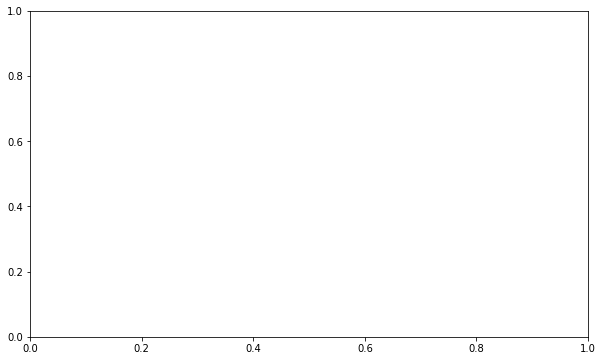

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(height_list1, v_per_mhz)
ax.set_ylim(6, 14)
size = 16
ax.tick_params(labelsize = size)
ax.set_ylabel('voltage(v) / secular frequency (MHz)', fontsize = size)
ax.set_xlabel('distance from substrate (um)', fontsize = size)